# Normalizacja danych

## Przykład - cena mieszkań

Rozważamy uproszczony przykład z ćwiczeń. Chcemy obliczać cenę mieszkania na podstawie liczby pokoi ($x_1$) i powierzchni ($x_2$).

Wybieramy model: 

$$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2\text{, gdzie }x_0 = 1$$

In [1]:
import pandas
cols = ["Expected","Rooms","SqrMeters"]
alldata = pandas.read_csv("gratkapl.csv", header=0, usecols=cols)
alldata[:10]

,Expected,Rooms,SqrMeters
0,269000,3,55.00
1,320000,3,79.00
2,146000,1,31.21
3,189000,2,44.00
4,480240,2,65.25
5,485500,2,56.00
6,299000,2,26.80
7,380000,3,63.90
8,340000,2,59.00
9,207076,2,43.10


Zakres wartości cech w danych treningowych:

In [2]:
import numpy as np

m = len(alldata)
X12 = np.matrix(alldata[["Rooms","SqrMeters"]])

print(X12[:10])
print("mins =", np.amin(X12, axis=0))
print("maxs =", np.amax(X12, axis=0))

[[  3.    55.  ]
 [  3.    79.  ]
 [  1.    31.21]
 [  2.    44.  ]
 [  2.    65.25]
 [  2.    56.  ]
 [  2.    26.8 ]
 [  3.    63.9 ]
 [  2.    59.  ]
 [  2.    43.1 ]]
mins = [[  1.    14.37]]
maxs = [[  10.  257.]]


Jaki kształt będzie miała funkcja kosztu dla $J(\theta_{1,2})$? Parametr $\theta_0$ na razie pomijamy.

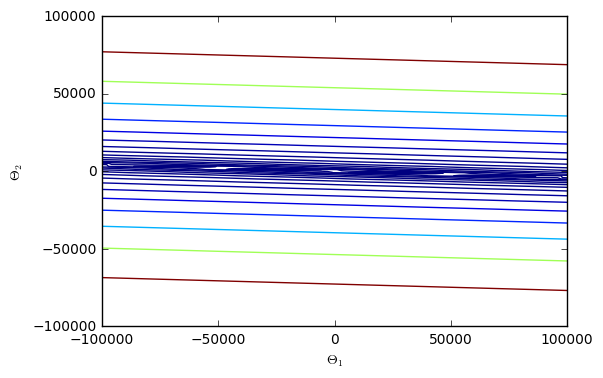

In [3]:
import numpy as np
import pylab as pl

%matplotlib inline

data = np.matrix(alldata[["Rooms","SqrMeters","Expected"]])

m, np1 = data.shape # np1 : n plus 1
n = np1 - 1
Xn = data[:,0:n]

XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m,np1)
yMx = np.matrix(data[:,-1]).reshape(m,1) / 1000.0

def hMx(theta, X):
    return X*theta

def JMx(theta, X, y):
    m = len(y)
    J = 1.0/(2.0*m)*((X*theta-y).T*(X*theta-y))
    return J.item()

def contourPlot(X, y, rescale=10**10):
    theta0_vals = np.linspace(-100000, 100000, 100)
    theta1_vals = np.linspace(-100000, 100000, 100)

    J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))
    for t1, element in enumerate(theta0_vals):
        for t2, element2 in enumerate(theta1_vals):
            thetaT = np.matrix([1.0, element, element2]).reshape(3,1)
            J_vals[t1, t2] = JMx(thetaT, X, y) / rescale
            
    pl.figure()
    pl.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20))
    pl.xlabel('$\Theta_1$')
    pl.ylabel('$\Theta_2$')

#print("XMx =", XMx[:5])
#print("yMx =", yMx[:5])

contourPlot(XMx, yMx)

## Skalowanie

Powinniśmy upewnić się, że wszystkie cechy przyjmują wartości w podobnym zakresie, np.:

$$-1 \leq x_i \leq 1$$

Skalowanie:

$$x_1 = \frac{x_1}{10}, x_2 = \frac{x_2}{257}$$

Jaki kształt teraz będzie miała funkcja kosztu dla $J(\theta_{1,2})$?

XMx = [[ 1.          0.3         0.21400778]
 [ 1.          0.3         0.307393  ]
 [ 1.          0.1         0.12143969]
 [ 1.          0.2         0.17120623]
 [ 1.          0.2         0.25389105]]


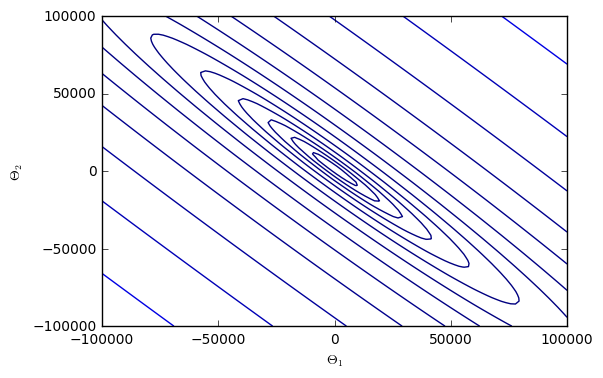

In [124]:
XMx_nrm = XMx / np.amax(XMx, axis=0)
print("XMx =", XMx_nrm[:5])

contourPlot(XMx_nrm, yMx, rescale=10**7)

## Normalizacja średniej

Dostosowanie naszych parametrów w taki sposób, aby ich średnie wartości były zbliżone do zera:

$$-0.5 \leq x_i \leq 0.5$$

Normalizacja:

$$x_1 := \frac{x_1 - 2.457}{10}, x_2 := \frac{x_2 - 56.954}{257}$$

Jak teraz będzie wyglądała funkcja kosztu dla $J(\theta_{1,2})$?

XMx = [[ 0.          0.05426    -0.00760341]
 [ 0.          0.05426     0.08578181]
 [ 0.         -0.14574    -0.1001715 ]
 [ 0.         -0.04574    -0.05040496]
 [ 0.         -0.04574     0.03227986]]


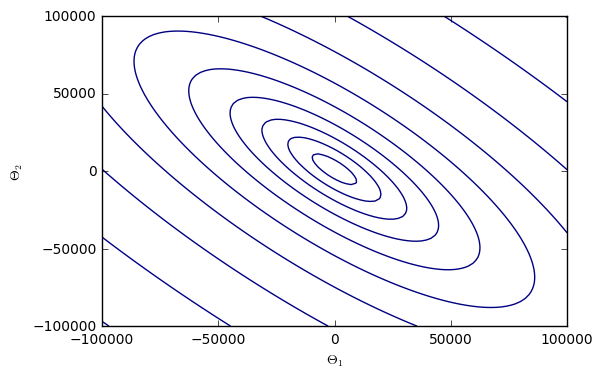

In [123]:
XMx_std = (XMx - np.mean(XMx, axis=0)) / np.amax(XMx, axis=0)
print("XMx =", XMx_std[:5])

contourPlot(XMx_std, yMx, rescale=10**7)